In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time

Enter the name of the person: Nishtha
Saved: 1/20


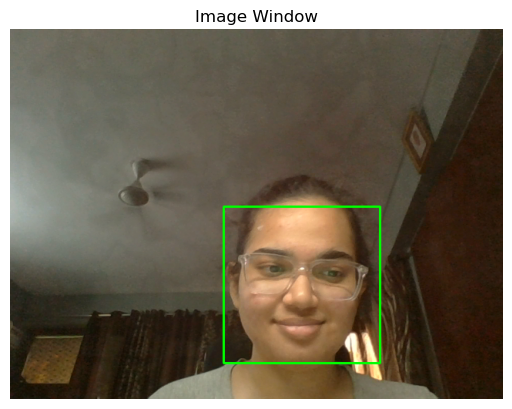

Saved: 2/20


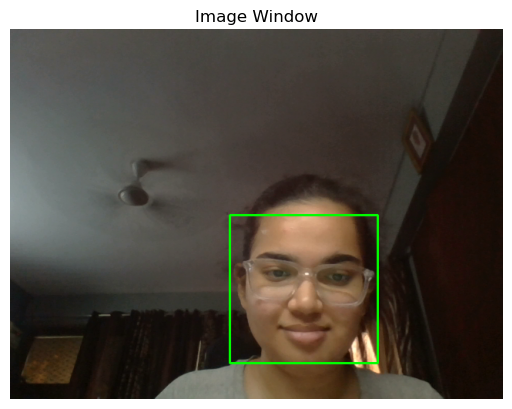

Saved: 3/20


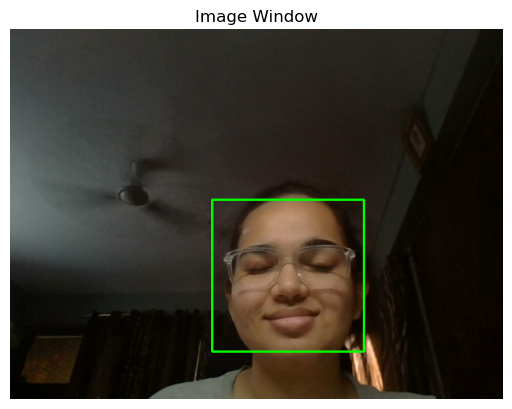

Saved: 4/20


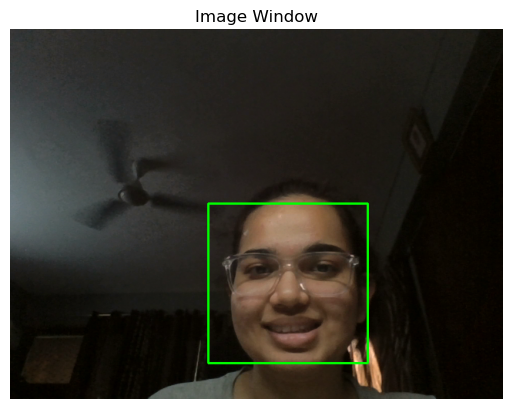

Saved: 5/20


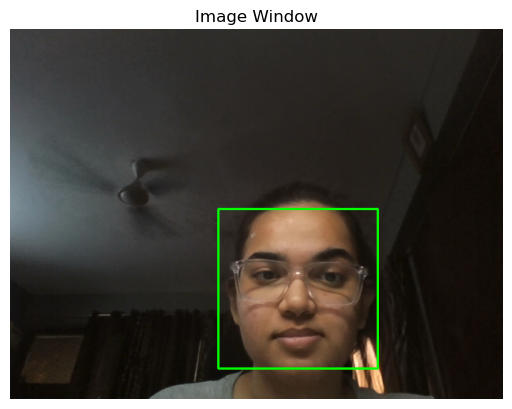

Saved: 6/20


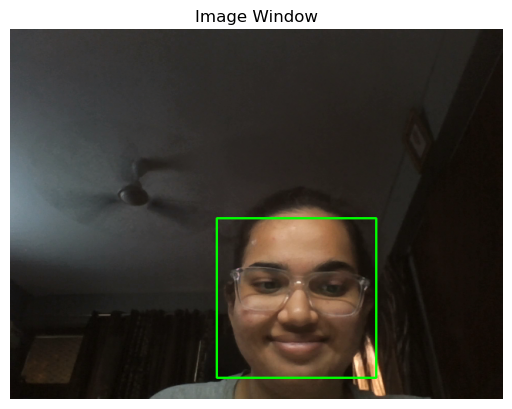

Saved: 7/20


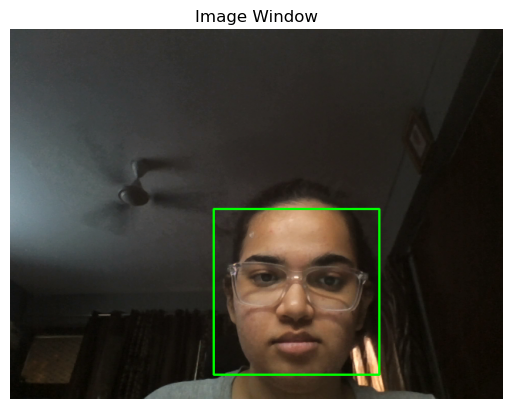

Saved: 8/20


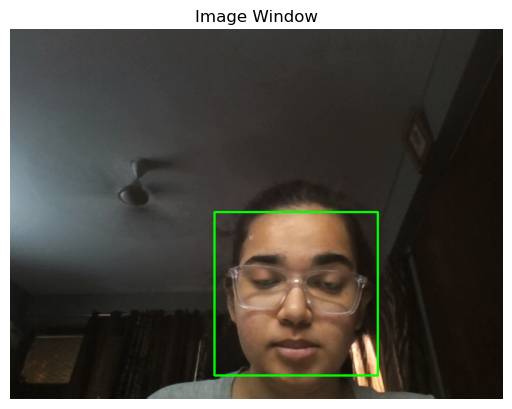

Saved: 9/20


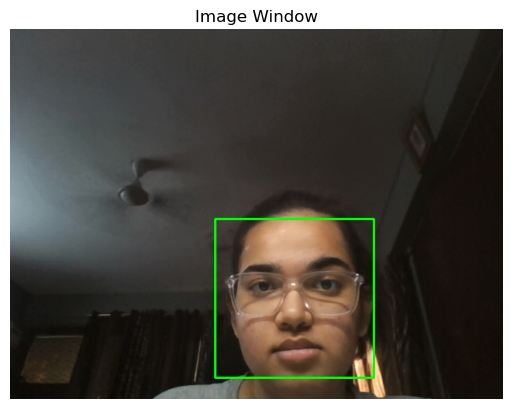

Saved: 10/20


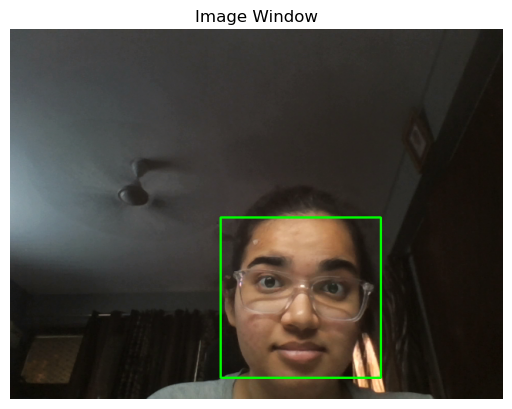

Saved: 11/20


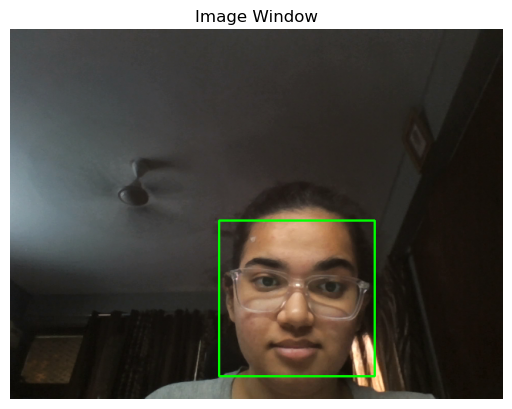

Saved: 12/20


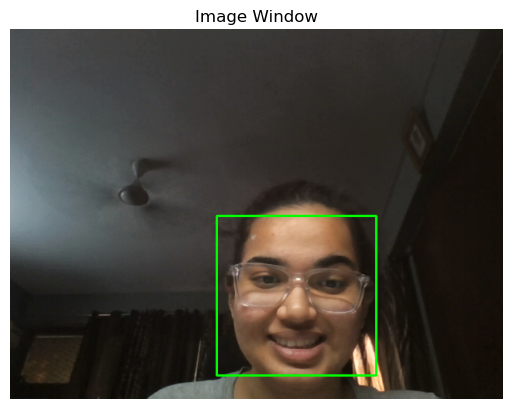

Saved: 13/20


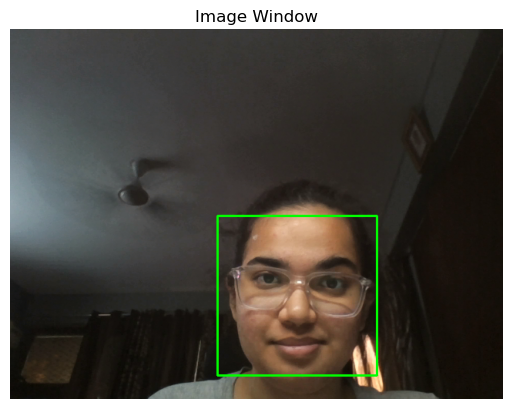

Saved: 14/20


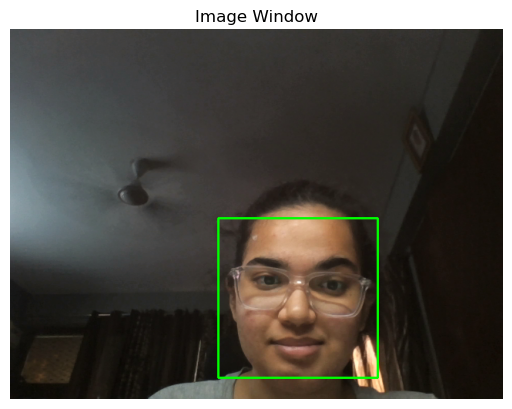

Saved: 15/20


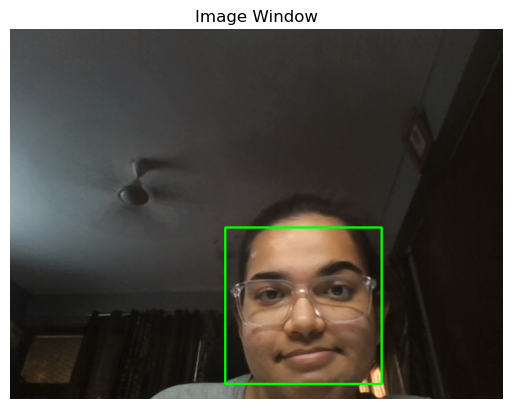

Saved: 16/20


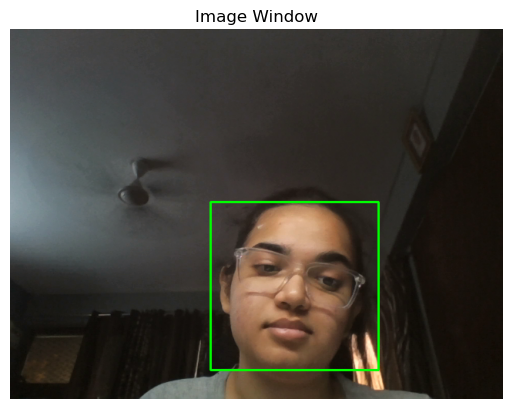

Saved: 17/20


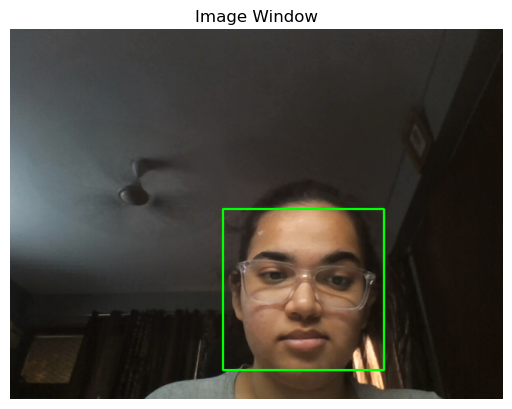

Saved: 18/20


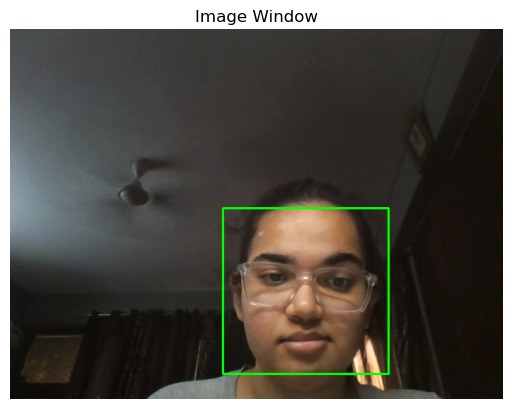

Saved: 19/20


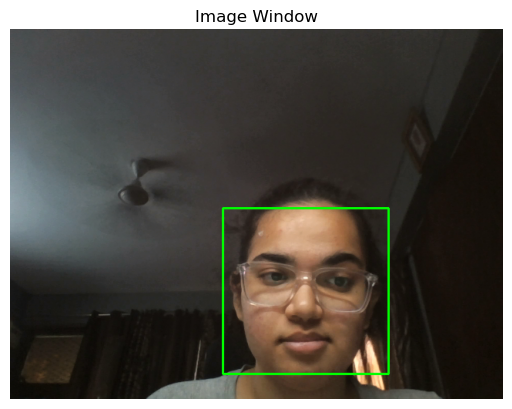

Saved: 20/20


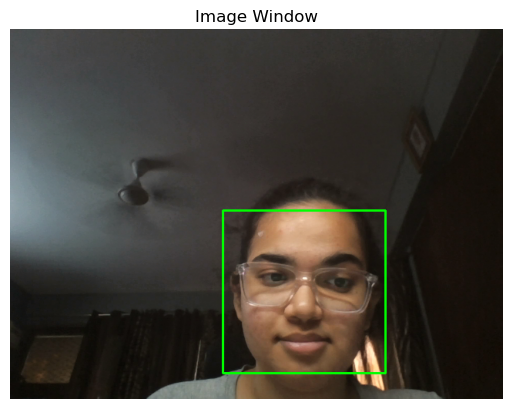

Data saved successfully at: ./dataset\Nishtha.npy


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [2]:
# Function to display images in Jupyter Notebook
def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Click 20 pictures of the person
cam = cv2.VideoCapture(0)
fileName = input("Enter the name of the person: ")
dataset_path = "./dataset"
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

model = cv2.CascadeClassifier("C:\\Users\\Nishtha\\Downloads\\haarcascade_frontalface_alt.xml")

# Create a list to save face data
faceData = []
pictures_to_take = 20
pictures_taken = 0

while pictures_taken < pictures_to_take:
    success, img = cam.read()
    if not success:
        print("Reading camera failed!")
        break

    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = model.detectMultiScale(grayImg, 1.3, 5)

    # Pick the largest face and save it
    if len(faces) > 0:
        f = faces[-1]  # Pick the largest face
        x, y, w, h = f
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop and save the largest face
        cropped_face = cv2.resize(grayImg[y:y + h, x:x + w], (100, 100))
        faceData.append(cropped_face)
        pictures_taken += 1
        print(f"Saved: {pictures_taken}/{pictures_to_take}")

    show_image(img, title="Image Window")

    # Delay for 1 second (1000 milliseconds)
    time.sleep(1)

# Convert faceData to numpy array and save it on disk
faceData = np.asarray(faceData)
m = faceData.shape[0]
faceData = faceData.reshape((m, -1))

filepath = os.path.join(dataset_path, fileName + ".npy")
np.save(filepath, faceData)
print("Data saved successfully at: " + filepath)

cam.release()
cv2.destroyAllWindows()
